# Hotend flow testing logs

## 2012-12-07: Hardened nozzles

In this test, I used the RainbowTester to compare several 0.4 mm nozzles that one might use to print abrasive filaments, such as those containing glow-in-the-dark or structural additives. In this test, I used a BMG extruder feeding a Dragon Standard Flow hotend. Filament was Atomic ABS, and the hotened was heated to 240°C. 

The testing procedure was as follows:

1. Extrude a small amount to prime the nozzle. Remove. 
2. Extrude 200 mm of filament at a set linear rate (mm/s)
3. Weigh the extruded filament
4. Repeat

I compared three wear-resistant nozzles I had on hand, plus a plated copper nozzle, which is my typical go-to for printing non-abrasive filaments.

In [2]:
import pandas as pd
from plotnine import *

In [3]:
# Load data

data_fp = '../Flow_testing/hardened_nozzles.txt'

hardened_df = pd.read_csv(data_fp,
                          sep='\t')

In [5]:
hardened_df.head()

,flow_rate,Phaetus_plated_copper,TriangleLabs_tool_steel,Phaetus_Tungsten_Carbide,3DMakerEngineering_Tungsten_Carbide
0,2.404063,0.47,0.49,0.50,0.49
1,2.404063,NaN,NaN,NaN,NaN
2,4.808125,0.48,0.48,0.48,0.49
3,4.808125,0.48,NaN,NaN,NaN
4,7.212187,0.47,0.47,0.48,0.49


In [11]:
hardened_df_long = hardened_df.melt(id_vars='flow_rate').dropna()
hardened_df_long.columns = ['flow_rate', 'nozzle', 'g_extruded']

hardened_df_long.head()

,flow_rate,nozzle,g_extruded
0,2.404063,Phaetus_plated_copper,0.47
2,4.808125,Phaetus_plated_copper,0.48
3,4.808125,Phaetus_plated_copper,0.48
4,7.212187,Phaetus_plated_copper,0.47
5,7.212187,Phaetus_plated_copper,0.47


In [19]:
?geom_smooth

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet imp

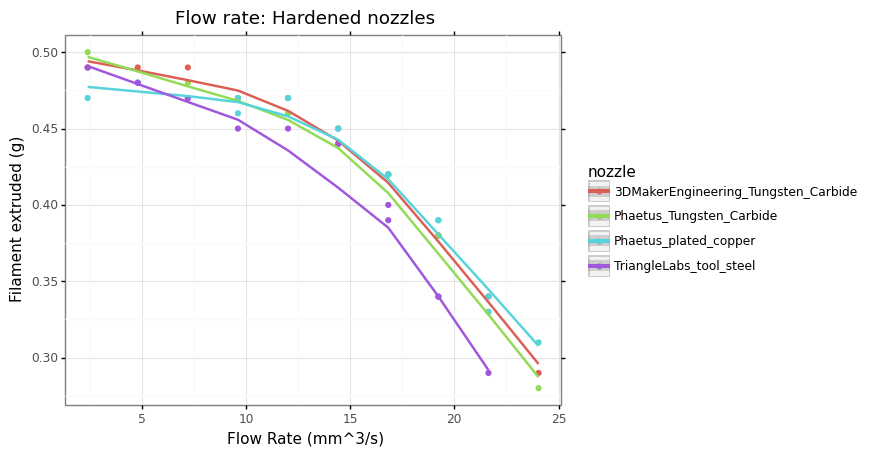

<ggplot: (8776136646250)>

In [26]:
hardened_plot = (
    ggplot(hardened_df_long, aes(x = 'flow_rate',
                                  y = 'g_extruded',
                                  color = 'nozzle')) +
        geom_point() +
        geom_smooth() +
        theme_bw() +
        ggtitle("Flow rate: Hardened nozzles") +
        xlab("Flow Rate (mm^3/s)") +
        ylab("Filament extruded (g)")
                 )

hardened_plot

Within the bounds of the precision I was able to reach with this short experiment, it looks like the tungsten carbide nozzle suffer no loss in flow rate when compared to the plated copper nozzle. The tool steel nozzle, by comparison, seems to cap out at a lower maximum flow rate, and may potentially underextrude more severely even at lower flow rates.

Qualitatively, I noticed the extruder actually skipping on the filament at the 19 mm^3/s point for the tool steel, compared to the 21.6 mm^3/s point for the other nozzles.